# CrossOver & Mutation Probability

In [1]:
from geneticAlgorithm.Genetic import *
problem = Multiple_knapsack("Sources_Files/test10x10.in")
knapsacks = problem.flat()
servers = problem.servers

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


/home/chivunito/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/chivunito/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [21]:

# servers=sorted(servers,key=lambda x:-x[1])
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

# print("Place disponible : ",problem.shape[0]*problem.shape[1]-len(problem.indispo))
# 
popSize=100
nGen=100
crossOverDico={}
# 
for cxpb in np.linspace(0.4,0.6,5):
    subList=[]
    for mutpb in np.linspace(0.4,0.6,5):
        gen,maxList=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)
        bestInd=np.max(maxList)
        print(cxpb,mutpb,bestInd)
        subList.append((mutpb,bestInd))    
    crossOverDico[cxpb]=subList

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


0.4 0.4 399.0


0.4 0.45 426.0


0.4 0.5 413.0


0.4 0.55 410.0


0.4 0.6 413.0


0.45 0.4 419.0


0.45 0.45 403.0


0.45 0.5 409.0


0.45 0.55 417.0


0.45 0.6 412.0


0.5 0.4 398.0


0.5 0.45 407.0


0.5 0.5 425.0


0.5 0.55 393.0


0.5 0.6 417.0


0.55 0.4 416.0


0.55 0.45 427.0


0.55 0.5 402.0


0.55 0.55 413.0


0.55 0.6 399.0


0.6 0.4 410.0


0.6 0.45 402.0


0.6 0.5 402.0


0.6 0.55 416.0


0.6 0.6 396.0


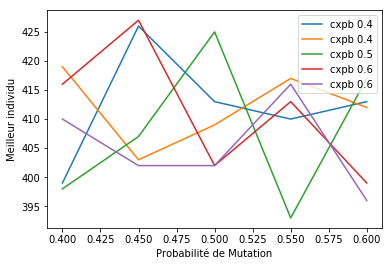

In [22]:
for cxpb,subList in crossOverDico.items():
   subList=np.array(subList)
   plt.plot(subList[:,0],subList[:,1], label="cxpb "+str(round(cxpb,1)))
plt.legend()
plt.xlabel('Probabilité de Mutation')
plt.ylabel('Meilleur individu')
plt.savefig("tes.png",dpi=800)
plt.show()
    

# Différents sort sur les serveurs

In [2]:
mutpb=0.45
cxpb=0.6
popSize=20
nGen=100

resultDico={}
problem = Multiple_knapsack("Sources_Files/test10x50.in")
knapsacks = problem.flat()
servers = problem.servers

# Not Sorted
resultDico['Not Sorted']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen,verbose=True)

# par puissance
servers=sorted(servers,key=lambda x:-x[1])
resultDico['Puissance décroissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)
servers=sorted(servers,key=lambda x:x[1])
resultDico['Puissance croissante']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

# par ratio
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])
resultDico['Puissance/size']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

# par taille 
servers=sorted(problem.servers,key=lambda x:x[0])
resultDico['size']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)

gen	nevals	avg	min	max
0  	20    	0  	0  	0  
1  	17    	86.8	0  	221
2  	17    	76.15	0  	240


3  	20    	93.15	0  	270
4  	15    	134  	0  	285
5  	14    	149.1	0  	281
6  	15    	160.45	0  	298
7  	16    	123.1 	0  	291


8  	19    	139.3 	0  	324
9  	16    	131.15	0  	304
10 	16    	125.4 	0  	304


11 	18    	130.7 	0  	326
12 	19    	140.75	0  	342
13 	18    	170.7 	0  	404


14 	16    	180.8 	0  	421
15 	17    	189.6 	0  	395
16 	12    	193.55	0  	416


17 	17    	197.65	0  	427
18 	14    	144.55	0  	427
19 	14    	138.45	0  	427
20 	13    	121.1 	0  	427


21 	13    	172.1 	0  	446
22 	14    	166.45	0  	446
23 	18    	193.3 	0  	446


24 	16    	154.25	0  	446
25 	16    	222.65	0  	453
26 	12    	210.15	0  	464
27 	15    	250   	0  	464


28 	17    	178.5 	0  	478
29 	15    	123.1 	0  	448
30 	17    	115.85	0  	450
31 	16    	119.05	0  	437
32 	18    	118.4 	0  	398


33 	16    	194.1 	0  	434
34 	15    	185.45	0  	434
35 	18    	157.85	0  	434
36 	16    	174.75	0  	434
37 	16    	189.45	0  	434
38 	18    	167.5 	0  	434


39 	15    	206.75	0  	434
40 	17    	234.95	0  	434
41 	15    	250.45	0  	434
42 	18    	167.5 	0  	446
43 	19    	202.8 	0  	434
44 	17    	218.65	0  	434
45 	17    	237.55	0  	434


46 	13    	293.55	0  	434
47 	16    	212.95	0  	434
48 	14    	217   	0  	434
49 	12    	217   	0  	434
50 	16    	195.3 	0  	434
51 	16    	217   	0  	434
52 	17    	265.4 	0  	434


53 	14    	217   	0  	434
54 	15    	150.5 	0  	434
55 	13    	255.1 	0  	434
56 	17    	257.35	0  	434
57 	14    	217   	0  	434
58 	18    	189.15	0  	434
59 	13    	226.05	0  	434


60 	18    	151.3 	0  	434
61 	12    	143.95	0  	434
62 	17    	162.25	0  	451
63 	18    	195.9 	0  	451
64 	17    	160.55	0  	434
65 	17    	172.4 	0  	434
66 	17    	320.55	0  	455


67 	14    	193.75	0  	434
68 	16    	220.3 	0  	434
69 	15    	225.9 	0  	453
70 	15    	141.7 	0  	434
71 	16    	234.85	0  	434
72 	16    	260.5 	0  	434


73 	18    	216.25	0  	450
74 	15    	227.95	0  	450
75 	14    	204.6 	0  	453
76 	17    	159.1 	0  	450
77 	18    	234.3 	0  	497
78 	16    	201.25	0  	450
79 	17    	222.5 	0  	464


80 	16    	227.4 	0  	464
81 	17    	198.7 	0  	464
82 	16    	201.7 	0  	464
83 	14    	259.05	0  	503
84 	13    	286.2 	0  	503
85 	20    	268.6 	0  	503
86 	18    	265.45	0  	526


87 	17    	275.55	0  	526
88 	17    	224.65	0  	503
89 	12    	258.65	0  	503
90 	10    	326.95	0  	503
91 	17    	293.55	0  	503
92 	18    	169.15	0  	503
93 	16    	236.3 	0  	503


94 	15    	197   	0  	503
95 	12    	239.25	0  	521
96 	17    	236.4 	0  	503
97 	14    	337.15	0  	503
98 	20    	201.2 	0  	503
99 	15    	212.8 	0  	503


100	15    	314.7 	0  	503


/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Not Sorted
Puissance décroissante
Puissance croissante
Puissance/size
size

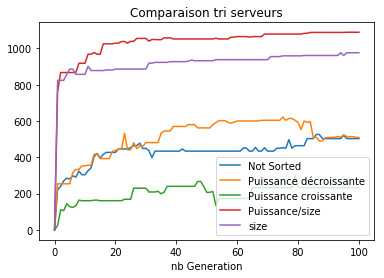

In [3]:
for result,(gen,maxList) in resultDico.items():
    print(result)
    plt.plot(gen,maxList,label=result)
plt.legend()
plt.title("Comparaison tri serveurs")
plt.xlabel('nb Generation')
plt.savefig('test.png',dpi=800)
plt.show()


# Comparaison Type de mutation

In [3]:
mutpb=0.45
cxpb=0.6
popSize=100
nGen=100

# Mutation normale
resultDico={}
problem = Multiple_knapsack("Sources_Files/test10x10.in")
knapsacks = problem.flat()
servers = problem.servers
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

resultDico['Mutation V2']=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen)


Mutation V2


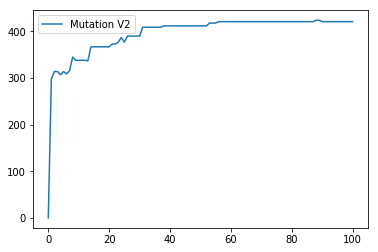

In [4]:
for result,(gen,maxList) in resultDico.items():
    print(result)
    plt.plot(gen,maxList,label=result)
plt.legend()
plt.savefig('test.png',dpi=800)
plt.show()

## Final Benchmarking

/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/chivunito/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


test5x20.in;360;4.29;24;83
FileName	score	Time	nbServers	totalSize
test5x20.in	360	4.29	24	83


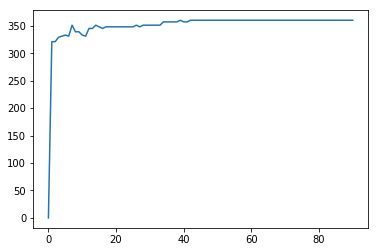

In [153]:

import time

mutpb=0.5
cxpb=0.5
popSize=100
nGen=90

# Mutation normale
resultDico={}
fileName="test10x20.in"
problem = Multiple_knapsack("Sources_Files/"+fileName)
knapsacks = problem.flat()
servers = problem.servers
servers=sorted(problem.servers,key=lambda x:-x[1]/x[0])

startTime=time.time()
gen,max_,best,score=scoreModel(servers,knapsacks,cxpb=cxpb,mutpb=mutpb,popSize=popSize,nGen=nGen,verbose=False)
totalTime=time.time()-startTime

best=np.array(best)
servers=np.array(servers)
totalSize=sum(servers[best>-1][:,0])
totalServers=np.sum(np.array(best)>-1)

print(fileName,score[0],round(totalTime,2),totalServers,totalSize,sep=";")
print("FileName","score","Time","nbServers","totalSize",sep="\t")
print(fileName,score[0],round(totalTime,2),totalServers,totalSize,sep="\t")

plt.plot(gen,max_)
plt.show()
